In [162]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import string
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from wordcloud import WordCloud, STOPWORDS
from dataprep.clean import clean_df


-5.99644272103393


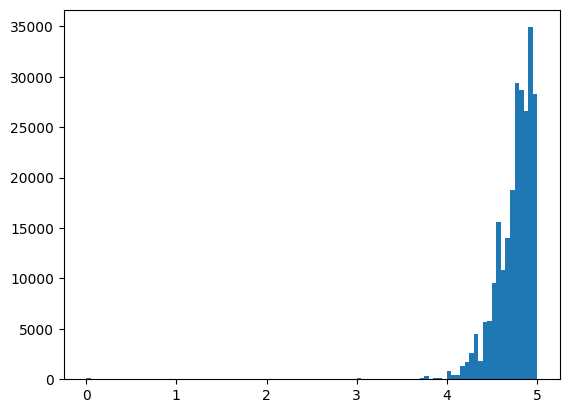

-34.380896080816854

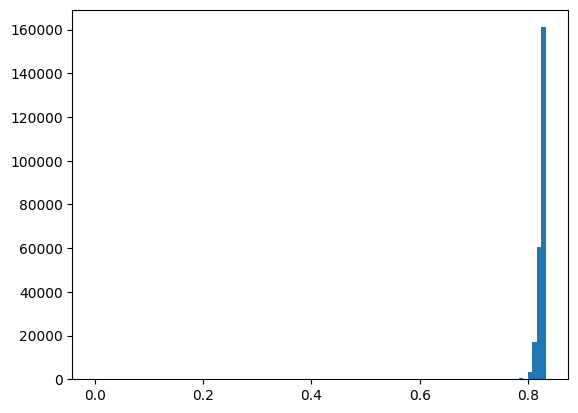

In [170]:
listingsDir = os.path.abspath('../Data/listings.csv')
reviewsDir = os.path.abspath('../Data/reviews.csv')
listings = pd.read_csv(listingsDir)
reviews = pd.read_csv(reviewsDir)
listings = pd.DataFrame(listings)

number = 250
#print(listings['review_scores_rating'].describe())
#listings['review_scores_rating'].hist(bins=30)

df = (listings
                  .set_index("id")
                  .join(reviews.set_index("listing_id"),
                        how="left")
                 )
df = shuffle(df)
df = df[pd.notnull(df['comments'])]
df_x=df["comments"]
df_x.fillna(" ")
df_y=df["review_scores_rating"]
print(df_y.skew())
plt.hist(df_y,bins=100)
plt.show()
df_y.fillna(df_y.mean(), inplace=True)
df_fixed = stats.boxcox(df_y+1, lmbda=-1.0)
plt.hist(df_fixed,bins=100)
df_fixed.skew()

In [32]:
cv = CountVectorizer(min_df=2, max_df=90, lowercase='True', encoding="ascii",ngram_range=(1, 2), stop_words = 'english')
tfidV = TfidfVectorizer(min_df=2, max_df=90, lowercase='True', encoding="ascii",ngram_range=(1, 2), stop_words = 'english')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
print(y_train)
x_train_fit=tfidV.fit_transform(x_train)
x_test_fit=tfidV.transform(x_test)


2.314467e+07    4.66
6.396190e+17    4.86
1.489882e+07    4.82
1.937339e+07    4.55
4.857684e+06    4.90
                ... 
3.702980e+07    4.64
1.743048e+07    4.84
1.302702e+07    4.74
2.835884e+07    4.63
2.963886e+07    4.85
Name: review_scores_rating, Length: 194635, dtype: float64


In [95]:
#model = LinearRegression()
model = Ridge(alpha=5)
rfr = RandomForestRegressor(n_estimators = 10, max_depth=8, random_state = 0)

In [96]:
print(y_train)
#y_train = y_train.values.astype("float32")
model.fit(x_train_fit,y_train)

2.314467e+07    4.66
6.396190e+17    4.86
1.489882e+07    4.82
1.937339e+07    4.55
4.857684e+06    4.90
                ... 
3.702980e+07    4.64
1.743048e+07    4.84
1.302702e+07    4.74
2.835884e+07    4.63
2.963886e+07    4.85
Name: review_scores_rating, Length: 194635, dtype: float64


Ridge(alpha=5)

In [98]:
#test sentences
test=tfidV.transform(["The apartment was really bad"])
output = model.predict(test)
print(output)
#Predict unseen data
y_pred =model.predict(x_test_fit)
scores = model.score(x_test_fit, y_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

[4.65770397]

RMSE:
 0.222


In [ ]:
x = df_x.drop(df_x.index[0:int(len(df_x)/2)]).values
y = df_y.drop(df_y.index[0:int(len(df_y)/2)]).values


C: 1
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0. -0.  0. ...  0.  0.  0.]
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0.  0.  0. ... -0.  0. -0.]

C: 5
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0. -0.  0. ...  0.  0.  0.]
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0.  0.  0. ... -0.  0. -0.]

C: 7
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0. -0.  0. ...  0.  0.  0.]
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0.  0.  0. ... -0.  0. -0.]

C: 8
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0. -0.  0. ... -0. -0.  0.]
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0.  0.  0. ... -0.  0. -0.]

C: 10
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0. -0.  0. ... -0. -0.  0.]
Lasso coeff: [-0.  0.  0. ...  0. -0. -0.]
Lasso coeff: [-0.  0.  0. ... -0.  0. -0.]

C: 15
Lasso coeff: [-0.  0.  0. ... -0. -0. -0.]
Lasso coeff: [-0. -0.  0. ... -0. -0.  0.]
Lasso coeff: [-0

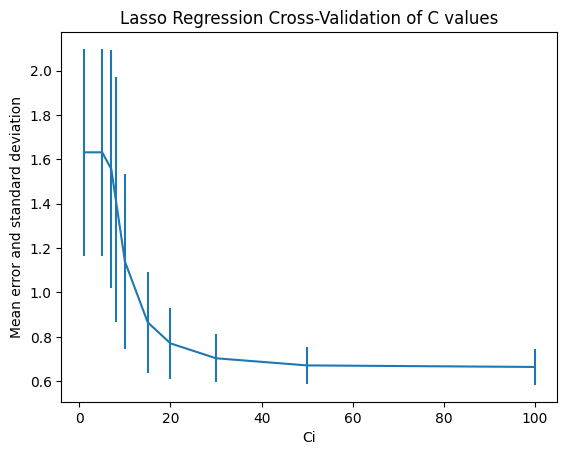

In [130]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
Cs2 = [1,5,7,8,10,15,20,30,50,100]
for Ci in Cs2:
    model = Lasso(alpha=1/(2*Ci))
    print("\nC: "+str(Ci))
    kf = KFold(n_splits=4)
    temp = []
    for train, test in kf.split(x):
        x_train_fit=tfidV.fit_transform(x[train])
        x_test_fit=tfidV.transform(x[test])
        model.fit(x_train_fit,y[train])
        ypred = model.predict(x_test_fit)
        print("Lasso coeff: "+str(model.coef_))
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

plt.figure(dpi=100)
plt.errorbar(Cs2,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean error and standard deviation')
plt.title('Lasso Regression Cross-Validation of C values')
plt.show()

Lasso coeff: [-3.82845193e-06 -3.70208958e-05  8.69959010e-05 ...  1.30249828e-05
 -9.77358360e-06 -1.27478065e-05]
Lasso coeff: [-1.49370998e-04  6.30588425e-05  3.01423546e-05 ...  3.22770542e-05
 -1.41632716e-05 -1.66562021e-05]
Lasso coeff: [-7.06417427e-06 -8.49689995e-05  7.29845754e-05 ...  2.66482500e-05
  3.21027569e-05  3.33949610e-06]
Lasso coeff: [-7.49454976e-06  1.43021553e-04  8.33971227e-05 ...  2.98431912e-05
 -2.07820374e-05 -2.29018202e-05]
Lasso coeff: [-7.84853032e-05  7.66312322e-05  4.63123217e-05 ... -1.19555423e-05
  3.25027254e-05 -3.72070874e-05]

C: 0.0001
Lasso coeff: [-4.62006240e-05 -3.41064973e-04  8.29907851e-04 ...  1.09605337e-04
 -1.16068886e-04 -1.42980249e-04]
Lasso coeff: [-0.00146237  0.00060171  0.00028938 ...  0.00031182 -0.00015588
 -0.00017849]
Lasso coeff: [-7.58135032e-05 -8.41876498e-04  7.04026176e-04 ...  2.56413156e-04
  2.77809863e-04  1.37110045e-05]
Lasso coeff: [-7.90853456e-05  1.30701303e-03  8.05652612e-04 ...  2.90647851e-04
 -2

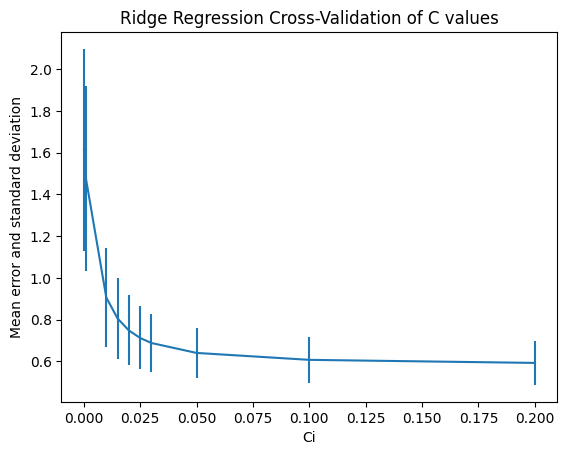

In [133]:
mean_error=[]
std_error=[]
C_ridge2 = [0.0001,0.001,0.01,0.015,0.02,0.025,0.03,0.05,0.1,0.2]
for Ci in C_ridge2:
    model = Ridge(alpha=1/(2*Ci))
    kf = KFold(n_splits=5)
    temp = []
    for train, test in kf.split(x):
        x_train_fit=tfidV.fit_transform(x[train])
        x_test_fit=tfidV.transform(x[test])
        model.fit(x_train_fit,y[train])
        ypred = model.predict(x_test_fit)
        print("Lasso coeff: "+str(model.coef_))
        temp.append(mean_squared_error(y[test],ypred))
    print("\nC: "+str(Ci))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

plt.figure(dpi=100)
plt.errorbar(C_ridge2,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean error and standard deviation')
plt.title('Ridge Regression Cross-Validation of C values')
plt.show()

In [175]:
baseline = DummyRegressor(strategy="median")
x_train_fit=tfidV.fit_transform(x[train])
x_test_fit=tfidV.transform(x[test])
baseline.fit(x_train_fit, y[train])
print("J(θ_baseline) = %f\n"%mean_squared_error(y, baseline.predict(Xpoly)))



ValueError: Found input variables with inconsistent numbers of samples: [693, 867]

In [172]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

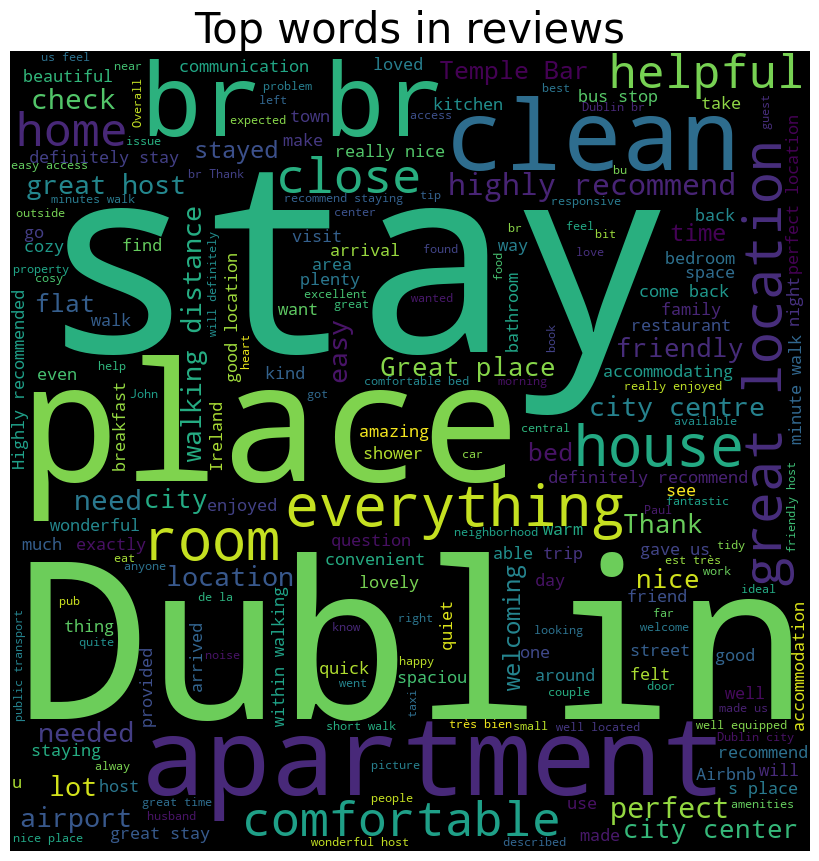

In [174]:
wordCloud_generator(df_x, title="Top words in reviews")